Image classifier using Maching Learning

1. Downloading Images for dataset

In [ ]:
from bing_image_downloader import downloader
# downloader.download("Motorbike", limit=30, output_dir='imgData')
# downloader.download("Cars", limit=30, output_dir='imgData')

2. Preprocessing - Resize & Flatten Images

In [2]:
import os   # Navigation bw folders
import matplotlib.pyplot as plt   # For displaying img
import numpy as np  # For calculations
from skimage.io import imread   # Reading an image
from skimage.transform import resize  # Resize image

# Convert 2D images to 1D - .flatten()
target = []
images = []
flat_data = []

CATEGORIES = ['bikes', 'cars']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  #  Iterate Sub-folders
  path = os.path.join('./imgData', category)

  # Iterate over images in each folder
  for img in os.listdir(path):
    img_arr = imread(os.path.join(path, img))
    # plt.imshow(img_arr)

    # Resize
    img_resized = resize(img_arr, (150,150,3))
    # Flatten - 2D to 1D
    flat_data.append(img_resized.flatten())

    # Store class number for each flat image
    target.append(class_num)
    images.append(img_resized)


# Convert data into numpy arrays
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)



3. Split Data - For Training & Testing

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size=0.2, random_state=109)


4. Train the Model Using Algorithms

In [4]:
# Classification Algorithm :
# SVM (Support Vector Machines)'s SVC (Support Vector Classification)

from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = [
  {
    'C': [1,10,100,1000], 'kernel': ['linear'],
  },
  {
    'C': [1,10,100,1000], 'gamma':[0.001,0.0001], 'kernel': ['rbf'],
  },
]

# "Prob = true " Means % prediction for each class
svc = svm.SVC(probability=True)
model = GridSearchCV(svc, param_grid)

model.fit(x_train, y_train)


GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [6]:
# Checking accuracy
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(x_test)
accuracy_score(y_pred, y_test)

# confusion_matrix(y_pred, y_test)

0.5833333333333334

In [7]:
# Save the Model
import pickle
pickle.dump(model, open('img_model.p', 'wb'))

In [8]:
# Load the saved Model
model = pickle.load(open('./img_model.p', 'rb'))

Testing Brand New Image

(183, 275, 3)
PREDICTED OUTPUT:  bikes


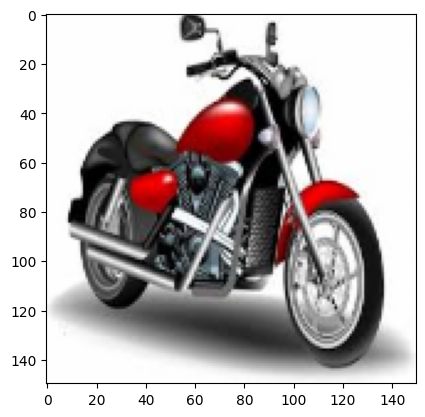

In [11]:
flat_data = []
url = input("Enter Url: ")
img = imread(url)
img_resized = resize(img, (150,150,3))

flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)

y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print("PREDICTED OUTPUT: ", y_out)

Hosting on WebApp

In [ ]:
# !pip install streamlit
# !pip install pyngrok

In [28]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image

st.title("Image Classifier Using ML")
st.text("Upload the Image")

model = pickle.load(open('./img_model.p', 'rb'))
uploaded_file = st.file_uploader("Chose an Img ... ", type="jpg")

if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img, caption="Uploaded Image")

  if st.button("PREDICT"):
    CATEGORIES = ['bikes', 'cars']
    st.write("Result ...")
    flat_data = []

    img = np.array(img)
    img_resized = resize(img, (150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)

    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f"PREDICTED OUTPUT: {y_out}")


Overwriting app.py


In [ ]:
from pyngrok import ngrok
# !nohup streamlit run app.py &

url = ngrok.connect(port='8501')
url